2.Accuracy might be prioritized for a election result predicting system. Since both outcomes are about equally likely, the data is balanced, and accuracy gives us a good general look at how the model performs.

Sensitivity might prioritized in a system that diagoses cancer. Since missing a diagnosis could be the difference between life and death, making sure to catch as many of the actual positives as possible.

Specificity would be important for a email spam filter system. While a false negative (letting a spam email through the filter) wouldn't matter much, blocking a potentially important email would cause a lot of trouble.

Precision is important in the legal system. A false positive (imprisoning someone innocent) does much more harm than letting someone guilty go free.

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab_reduced_noNaN = ab.dropna()

hi


4.

In [5]:
from sklearn.model_selection import train_test_split

# Assuming ab_reduced_noNaN is already defined and cleaned.
# Split the data: 80% for training, 20% for testing
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in each dataset
print("Training set size:", len(ab_reduced_noNaN_train))
print("Test set size:", len(ab_reduced_noNaN_test))


Training set size: 248
Test set size: 62


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.363\nsamples = 248\nvalue = [59, 189]\nclass = P'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.207\nsamples = 179\nvalue = [21, 158]\nclass = P'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 44\nvalue = [11, 33]\nclass = P'),
 Text(0.375, 0.16666666666666666, 'gini = 0.137\nsamples = 135\nvalue = [10, 125]\nclass = P'),
 Text(0.75, 0.5, 'List Price <= 35.375\ngini = 0.495\nsamples = 69\nvalue = [38, 31]\nclass = H'),
 Text(0.625, 0.16666666666666666, 'gini = 0.452\nsamples = 58\nvalue = [38, 20]\nclass = H'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = P')]

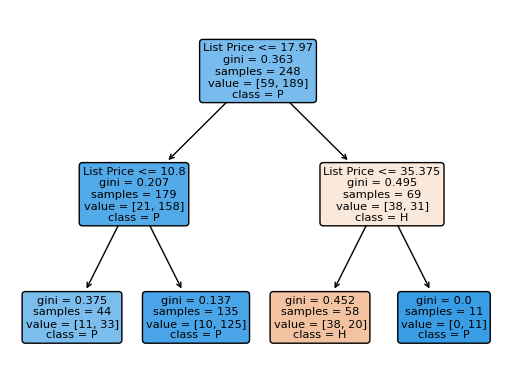

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Step 1: Prepare the data
X_train = ab_reduced_noNaN_train[['List Price']]  # Feature: List Price
y_train = ab_reduced_noNaN_train['Hard_or_Paper']  # Target: Hard_or_Paper (hardcover or paperback)

# Step 2: Initialize the DecisionTreeClassifier with max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 3: Fit the classifier
clf.fit(X_train, y_train)

# Step 4: Visualize the trained decision tree
plot_tree(clf, filled=True, feature_names=['List Price'], class_names=clf.classes_, rounded=True)


4.There are 248 samples in the training set and 62 samples in the testing set. The model classifies the book as hardback only if list price is above 17.97 and equal or below 35.375.

Training set size: 248
Test set size: 62


[Text(0.4342105263157895, 0.9, 'List Price <= 17.97\ngini = 0.363\nsamples = 248\nvalue = [189, 59]\nclass = False'),
 Text(0.21052631578947367, 0.7, 'NumPages <= 82.0\ngini = 0.207\nsamples = 179\nvalue = [158, 21]\nclass = False'),
 Text(0.10526315789473684, 0.5, 'Thick <= 0.2\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = True'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.15789473684210525, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = True'),
 Text(0.3157894736842105, 0.5, 'Thick <= 1.65\ngini = 0.168\nsamples = 173\nvalue = [157, 16]\nclass = False'),
 Text(0.2631578947368421, 0.3, 'Thick <= 0.55\ngini = 0.159\nsamples = 172\nvalue = [157, 15]\nclass = False'),
 Text(0.21052631578947367, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]\nclass = False'),
 Text(0.3157894736842105, 0.1, 'gini = 0.194\nsamples = 138\nvalue = [123, 15]\nclass = False'),
 Text(0.3684210526315789, 0.3, 'gini = 0.0\nsamples = 1\nvalue = 

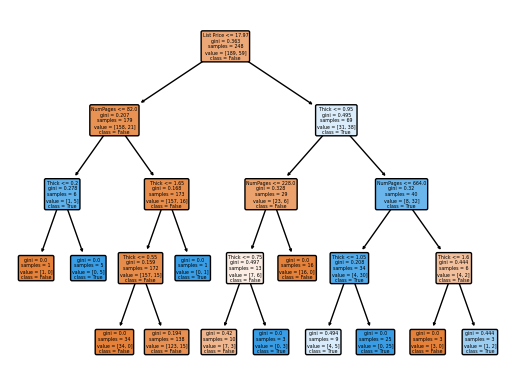

In [14]:
# Prepare the target variable (Hardcover or Paperback)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Convert to binary format: 1 for hardcover, 0 for paperback

# Prepare the feature variables (NumPages, Thick, List Price)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report the number of observations in the training and test datasets
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier with max_depth = 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model on the training data
clf2.fit(X_train, y_train)

from sklearn.tree import plot_tree

# Convert class labels to strings
class_names = [str(cls) for cls in clf2.classes_]

# Visualize the decision tree with the correct class names
plot_tree(clf2, 
          filled=True, 
          feature_names=['NumPages', 'Thick', 'List Price'], 
          class_names=class_names,  # Ensure class names are in string format
          rounded=True)


6.

clf - Sensitivity: 0.8947368421052632
clf - Specificity: 0.9069767441860465
clf - Accuracy: 0.9032258064516129
clf2 - Sensitivity: 0.7368421052631579
clf2 - Specificity: 0.9069767441860465
clf2 - Accuracy: 0.8548387096774194


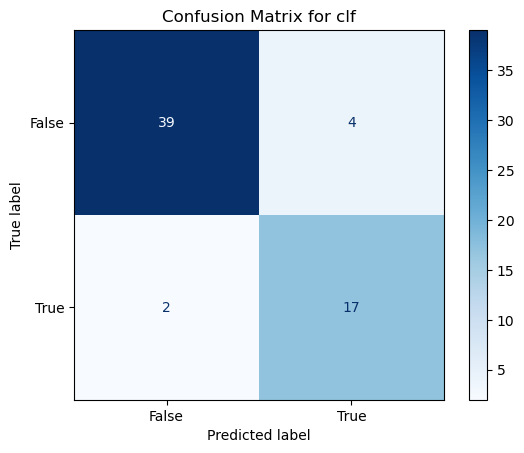

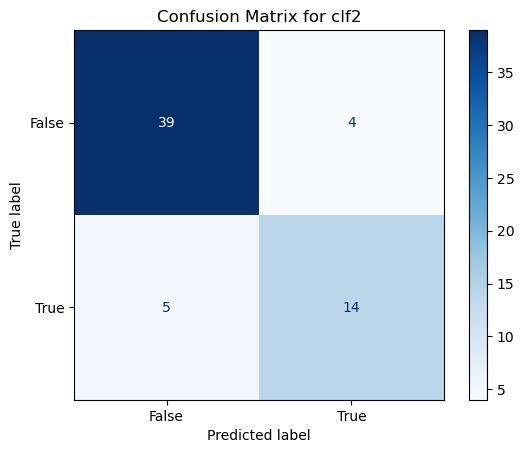

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming ab_reduced_noNaN is your cleaned dataframe
# Define the features for training (using 'NumPages', 'Thick', 'List Price')
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train clf using only 'List Price' for clf
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train[['List Price']], y_train)

# Create and train clf2 using all features ('NumPages', 'Thick', 'List Price') for clf2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Make predictions on the test set for both models
y_pred_clf = clf.predict(X_test[['List Price']])
y_pred_clf2 = clf2.predict(X_test)

# Generate confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
# Generate confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Display confusion matrix for clf
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=clf.classes_)
disp_clf.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for clf")  # Set the title using plt.title()

# Display confusion matrix for clf2
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=clf2.classes_)
disp_clf2.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for clf2")  # Set the title using plt.title()

# Calculate Sensitivity, Specificity, and Accuracy for clf
TP_clf = cm_clf[1, 1]
TN_clf = cm_clf[0, 0]
FP_clf = cm_clf[0, 1]
FN_clf = cm_clf[1, 0]

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

print("clf - Sensitivity:", sensitivity_clf)
print("clf - Specificity:", specificity_clf)
print("clf - Accuracy:", accuracy_clf)

# Calculate Sensitivity, Specificity, and Accuracy for clf2
TP_clf2 = cm_clf2[1, 1]
TN_clf2 = cm_clf2[0, 0]
FP_clf2 = cm_clf2[0, 1]
FN_clf2 = cm_clf2[1, 0]

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

print("clf2 - Sensitivity:", sensitivity_clf2)
print("clf2 - Specificity:", specificity_clf2)
print("clf2 - Accuracy:", accuracy_clf2)

# Show the plots
plt.show()


6.
clf - Sensitivity: 0.8947368421052632
clf - Specificity: 0.9069767441860465
clf - Accuracy: 0.9032258064516129

clf2 - Sensitivity: 0.7368421052631579
clf2 - Specificity: 0.9069767441860465
clf2 - Accuracy: 0.8548387096774194

7.The first confusion matrix predicts only based on List Price, while the second matrix uses more variables like Thick and NumPages. The second matrix is more likely to be able to accurately predict the outcome, since it accounts for more factors, but it is also more likely to be overfit.

The confusions matrixes that we made are better because they set aside some data for testing, instead of training and testing on all the data. This lets us account for overfitting when testing, letting us accurately see how each model generalizes.

https://chatgpt.com/share/67402970-ec7c-8013-8799-a7f60f53206c

Certainly! Here's a summary of our chat session:

Classification Decision Trees vs Multiple Linear Regression:

We discussed the differences between classification decision trees and multiple linear regression. Decision trees are non-linear models that create a tree-like structure to make predictions, while multiple linear regression is a linear model that fits a straight line to the data and predicts continuous outcomes.
Real-World Applications:

We explored how accuracy, sensitivity, specificity, and precision are used in real-world scenarios, particularly in medical diagnostics and the legal system, where precision is crucial to avoid false positives.
Code Walkthrough:

You shared code that worked with a dataset of books, specifically focusing on predicting whether a book is hardcover or paperback based on features like "List Price," "NumPages," "Weight_oz," and "Thick."
The code involved creating a decision tree classifier (clf), training it on the List Price feature, and using different evaluation metrics like accuracy, sensitivity, and specificity.
We discussed how decision trees split the data and how predictions are made based on various features.
Confusion Matrix Issues:

You encountered errors related to fitting models and visualizing decision trees, such as mismatched feature names and an issue with setting titles for confusion matrix plots. I provided corrections to the code and clarified how confusion matrices are used to evaluate model performance.
We discussed how confusion matrices for clf and clf2 can reveal model performance, with clf2 being a more complex model using additional features, which may perform better on the training data but could risk overfitting.
Evaluation Metrics:

Finally, we explored confusion matrices in more detail, calculating performance metrics like sensitivity, specificity, and accuracy for both models (clf and clf2), explaining how the inclusion of more features in the second model improved predictions, and how evaluating models on separate training and testing datasets is essential for avoiding overfitting.
The session was focused on understanding decision trees, their performance evaluation using confusion matrices, and handling common issues when fitting and visualizing models